Tranformada de Fourier

Pasar del domininio del espacio f(x,y) -> Dominicia de la frecuencia F(u,v)
Compleja

Obtener la funcion de nuestra imagen




Importar las librerias necesarias

In [10]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Obtener nuestra función fuente
se obtiene en escala de grises
f(x,y) = 0.25*fr(x,y) + 0.25*fb(x,y)+0.5*fg(x,y)

In [11]:
fImg = cv.imread("lenna.jpeg",0)

Obtener las dimensiones de mi imagen

In [12]:
(imH,imW) = fImg.shape

Iniciamos el cálculo de la tranformada de Fourier
la tamformada nos tramforma al plano complejo

In [13]:
FImg = np.fft.fft2(fImg)


In [14]:
print(FImg[0,0])

(325402989+0j)


el origen esta en la coordenada 0,0


In [15]:
shiftFImg = np.fft.fftshift(FImg)

para graficar pasamos a escala de decibeles

In [17]:
mSpectrum= 20*np.log(np.abs(shiftFImg))

Graficamos la imagen origen y la magnitud de la frecuencia

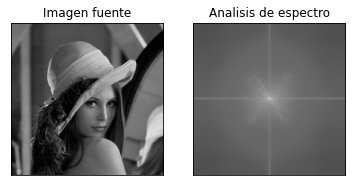

In [20]:
plt.subplot(121)
plt.imshow(fImg,cmap='gray')
plt.title("Imagen fuente")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(mSpectrum,cmap='gray')
#plt.imshow(mSpectrum)
plt.title("Analisis de espectro")
plt.xticks([])
plt.yticks([])
plt.show()



Implementación de filtro con la tranformada de fourier

vamos a crear nuestra mascara vacia

In [21]:
mask = np.zeros([imH,imW,2],np.uint8)

Indicamos que valores queremos conservar indicado con la mascara


In [40]:
maskRage = 3
(imHR,imWR) = (int(imH/2),int(imW/2))
mask[imHR-maskRage:imHR+maskRage,imWR-maskRage:imWR+maskRage] = 1

Pasamos a la transforamda de fouerier pero con números flotantes

In [41]:
dFImg = cv.dft(np.float32(fImg),flags=cv.DFT_COMPLEX_OUTPUT)
dftShift = np.fft.fftshift(dFImg)

En el espacio aplicar un filtro es hacer la comvolucion de la funcion fuente con la funcion del filtro
en el espectro aplicar el filtro es hacer la multiplicacion de la función fuente con la funcion del filtro en el espectro de fourier (F(u,v))(G(u,V))



In [42]:
fImgShift = dftShift*mask

Regresamos al dominio del espacio


In [43]:
bfImgShif=np.fft.ifftshift(fImgShift)
imgBack = cv.idft(bfImgShif)
imgBack = cv.magnitude(imgBack[:,:,0],imgBack[:,:,1])

graficar la salida del filtro

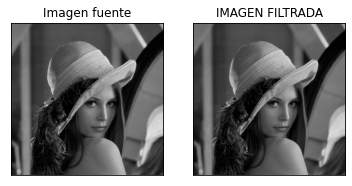

In [44]:
plt.subplot(121)
plt.imshow(fImg,cmap='gray')
plt.title("Imagen fuente")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(imgBack,cmap='gray')
plt.title("IMAGEN FILTRADA")
plt.xticks([])
plt.yticks([])
plt.show()

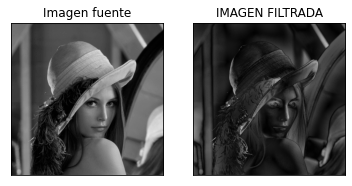

In [45]:
maskHigh = np.ones([imH,imW,2],np.uint8)
maskHigh[imHR-maskRage:imHR+maskRage,imWR-maskRage:imWR+maskRage] = 0
dFImg2 = cv.dft(np.float32(fImg),flags=cv.DFT_COMPLEX_OUTPUT)
dftShift2 = np.fft.fftshift(dFImg2)
fImgShift2 = dftShift*maskHigh
bfImgShif2=np.fft.ifftshift(fImgShift2)
imgBack2 = cv.idft(bfImgShif2)
imgBack2 = cv.magnitude(imgBack2[:,:,0],imgBack2[:,:,1])
plt.subplot(121)
plt.imshow(fImg,cmap='gray')
plt.title("Imagen fuente")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(imgBack2,cmap='gray')
plt.title("IMAGEN FILTRADA")
plt.xticks([])
plt.yticks([])
plt.show()